# DBSCAN

In [12]:
versioninfo()

Julia Version 1.11.4
Commit 8561cc3d68d (2025-03-10 11:36 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, skylake)
Threads: 8 default, 0 interactive, 4 GC (on 8 virtual cores)
Environment:
  LD_LIBRARY_PATH = /home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:
  DYLD_LIBRARY_PATH = /home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:
  JULIA_NUM_THREADS = 8


In [13]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


In [14]:
using DataFrames, MLJ

Generate 100 synthetic data with 2 clusters

In [15]:
X, y = make_blobs(100, 2; centers=3, cluster_std=[1.0, 1.0, 2.0])

(Tables.MatrixTable{Matrix{Float64}} with 100 rows, 2 columns, and schema:
 :x1  Float64
 :x2  Float64, CategoricalArrays.CategoricalValue{Int64, UInt32}[1, 2, 1, 2, 3, 3, 1, 3, 1, 3  …  3, 2, 3, 2, 2, 2, 3, 2, 2, 3])

In [16]:
using Plots

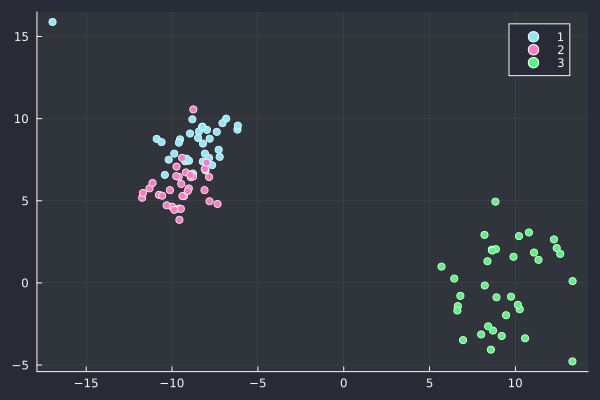

In [17]:
scatter(X.x1, X.x2, group=y)

Load and build a `dbscan` machine

In [18]:
DBSCAN = @load DBSCAN pkg=Clustering

import MLJClusteringInterface ✔


[ Info: For silent loading, specify `verbosity=0`. 


MLJClusteringInterface.DBSCAN

In [19]:
dbscan = DBSCAN(radius=2, min_neighbors=10)

DBSCAN(
  radius = 2, 
  leafsize = 20, 
  min_neighbors = 10, 
  min_cluster_size = 1)

In [20]:
mach_dbscan = machine(dbscan)

untrained Machine; does not cache data
  model: DBSCAN(radius = 2, …)
  args: 


Compare cluster labels w/ actual labels

In [21]:
ŷ = predict(mach_dbscan, X)
compare = zip(ŷ, y) |> collect
first(compare, 5)

5-element Vector{Tuple{CategoricalArrays.CategoricalValue{Int64, UInt32}, CategoricalArrays.CategoricalValue{Int64, UInt32}}}:
 (1, 1)
 (1, 2)
 (1, 1)
 (1, 2)
 (2, 3)

Visualize clusters

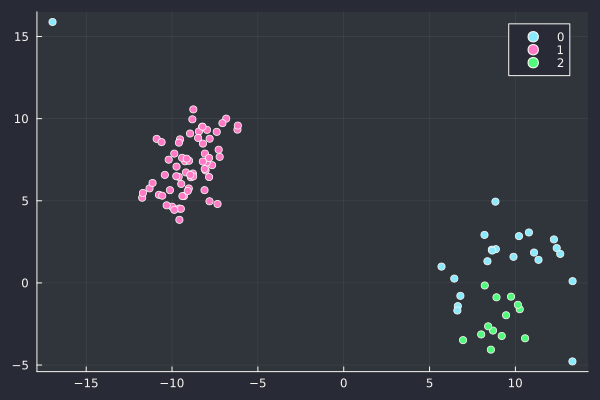

In [22]:
scatter(X.x1, X.x2, group=ŷ)